# Homework 5  
## 第一部分：奥运视频热议度分析
## 姓名：王宝琪   学号：22210980075

### 1. 导入数据，查看数据内容

In [1]:
#导入所需库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.metrics import roc_curve,auc,accuracy_score,confusion_matrix
plt.rcParams['font.sans-serif']="SimHei"
plt.rcParams['axes.unicode_minus'] =False

In [2]:
#读入数据
df=pd.read_csv("djolpdata.csv")

In [3]:
df.head()

,hot_or_not,type_sv,nar_angle,zf_sv,length_log,title_sv,media_type,media_fans_log,type_time_effe,month1,love_sv_log,com_sv_log
0,热议,传统话题,品牌宣传,中,1.000000,#东京奥运会倒计时1天 长风破浪会有时，直挂云帆济沧海。勇攀高峰吧！还有1天，我们就是一起冒...,主办方及授权传播主体,5.276462,即时性,1,4.806180,3.386856
1,热议,传统话题,品牌宣传,中,1.000000,#东京奥运会倒计时2天 奥林匹克之火，即将点亮世界 距离#东京奥运会 开幕还有2天啦,主办方及授权传播主体,5.276462,即时性,1,4.301030,3.082785
2,非热议,传统话题,品牌宣传,中,1.477121,#东京奥运会倒计时4天 2021年7月23日 北京时间19:00 #东京奥运 开幕在即,主办方及授权传播主体,5.276462,即时性,1,3.294466,1.633468
3,非热议,传统话题,品牌宣传,中,1.477121,#东京奥运会倒计时3天 还有3天#东京奥运会即将开幕,主办方及授权传播主体,5.276462,即时性,1,2.627366,1.447158
4,非热议,传统话题,品牌宣传,中,1.079181,#夺冠2021 东京奥运会倒计时一天，运动健儿们加油！#东京奥运会,其他机构或个人自媒体,5.369216,即时性,1,2.136721,0.477121


导入数据后可见数据的基本形式如上，其中title_sv列在之后的建模过程中无用，故删除

In [4]:
data=df.drop(columns='title_sv')

data

,hot_or_not,type_sv,nar_angle,zf_sv,length_log,media_type,media_fans_log,type_time_effe,month1,love_sv_log,com_sv_log
0,热议,传统话题,品牌宣传,中,1.000000,主办方及授权传播主体,5.276462,即时性,1,4.806180,3.386856
1,热议,传统话题,品牌宣传,中,1.000000,主办方及授权传播主体,5.276462,即时性,1,4.301030,3.082785
2,非热议,传统话题,品牌宣传,中,1.477121,主办方及授权传播主体,5.276462,即时性,1,3.294466,1.633468
3,非热议,传统话题,品牌宣传,中,1.477121,主办方及授权传播主体,5.276462,即时性,1,2.627366,1.447158
4,非热议,传统话题,品牌宣传,中,1.079181,其他机构或个人自媒体,5.369216,即时性,1,2.136721,0.477121
...,...,...,...,...,...,...,...,...,...,...,...
574,热议,传统话题,赛事周边,中,1.785330,其他机构或个人自媒体,6.538197,长期,1,5.518514,4.255273
575,热议,传统话题,赛事周边,中,1.113943,其他机构或个人自媒体,6.834294,长期,1,5.545307,4.322219
576,热议,传统话题,赛事周边,中,1.662758,其他机构或个人自媒体,6.725176,长期,1,4.623249,3.071514
577,热议,传统话题,赛事周边,中,2.113943,其他机构或个人自媒体,5.416641,长期,1,3.708336,2.075547


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hot_or_not      579 non-null    object 
 1   type_sv         579 non-null    object 
 2   nar_angle       579 non-null    object 
 3   zf_sv           579 non-null    object 
 4   length_log      579 non-null    float64
 5   media_type      579 non-null    object 
 6   media_fans_log  579 non-null    float64
 7   type_time_effe  579 non-null    object 
 8   month1          579 non-null    int64  
 9   love_sv_log     579 non-null    float64
 10  com_sv_log      579 non-null    float64
dtypes: float64(4), int64(1), object(6)
memory usage: 49.9+ KB


去除视频标题列后剩余11列，其中除length_log,media_fans_log,month1,love_sv_log,com_sv_log列外均为定性变量，在之后会转化为因子类型进行建模。

### 2. 绘制评论量和点赞数的直方图

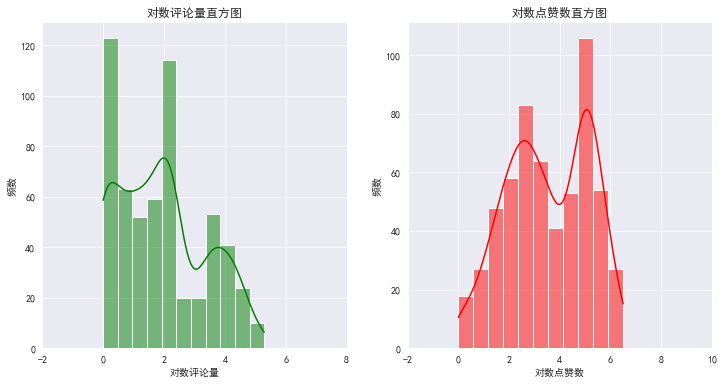

In [6]:
sns.set_style('darkgrid',{'font.sans-serif':['SimHei','Arial']})
fig,axs=plt.subplots(ncols=2,figsize=(12,6))
sns.histplot(data=data,x='com_sv_log',ax=axs[0],kde=True,color='g')
sns.histplot(data=data,x='love_sv_log',ax=axs[1],kde=True,color='r')
axs[0].set(ylabel='频数',xlabel='对数评论量',title='对数评论量直方图',xlim=(-2,8))
axs[1].set(ylabel='频数',xlabel='对数点赞数',title='对数点赞数直方图',xlim=(-2,10))
plt.show()

对数评论量和对数点赞数的直方图如上图所示。对数评论量集中分布在0-2，说明奥运视频的评论量不会太多，对数评论数目超过4的就很少了；对数点赞数的分布比较均匀，主要集中在2-6，说明大多数人倾向于给视频点赞。综上，大多数人可能会点赞，但不太可能会评论，所以导致了对数点赞数的平均数目要多于对数评论数。

### 3. 将评论量对数进行分组，并将原数据中其他符号类型变量转化为因子变量

In [7]:
data['hot_or_not'] = data['com_sv_log'].apply(lambda x:'热议' if x>=2 else '非热议')

In [8]:
for col in data.select_dtypes(include=['object']).columns:
    data[col]=pd.Categorical(data[col]).codes

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hot_or_not      579 non-null    int8   
 1   type_sv         579 non-null    int8   
 2   nar_angle       579 non-null    int8   
 3   zf_sv           579 non-null    int8   
 4   length_log      579 non-null    float64
 5   media_type      579 non-null    int8   
 6   media_fans_log  579 non-null    float64
 7   type_time_effe  579 non-null    int8   
 8   month1          579 non-null    int64  
 9   love_sv_log     579 non-null    float64
 10  com_sv_log      579 non-null    float64
dtypes: float64(4), int64(1), int8(6)
memory usage: 26.1 KB


In [10]:
data['hot_or_not']=data['hot_or_not'].astype('float64')
data['type_sv']=data['type_sv'].astype('category')
data['nar_angle']=data['nar_angle'].astype('category')
data['zf_sv']=data['zf_sv'].astype('category')
data['media_type']=data['media_type'].astype('category')
data['type_time_effe']=data['type_time_effe'].astype('category')
data['month1']=data['month1'].astype('float64')


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   hot_or_not      579 non-null    float64 
 1   type_sv         579 non-null    category
 2   nar_angle       579 non-null    category
 3   zf_sv           579 non-null    category
 4   length_log      579 non-null    float64 
 5   media_type      579 non-null    category
 6   media_fans_log  579 non-null    float64 
 7   type_time_effe  579 non-null    category
 8   month1          579 non-null    float64 
 9   love_sv_log     579 non-null    float64 
 10  com_sv_log      579 non-null    float64 
dtypes: category(5), float64(6)
memory usage: 30.9 KB


### 4. 描述性分析，重点分析视频长度、话题类型、叙事角度、态度倾向这四个自变量对因变量的影响

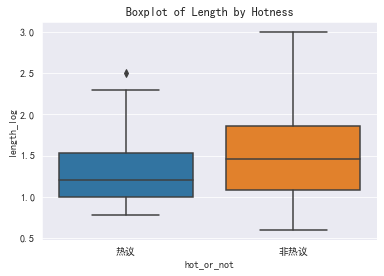

In [12]:
# 视频长度分布箱线图
sns.boxplot(x='hot_or_not', y='length_log', data=df)
plt.title('Boxplot of Length by Hotness')
plt.show()

对于视频长度和是否热议的关系，其箱线图如上图所示。可见，非热议视频的视频长度的整体水平要高于热议视频，其最小值要低于热议视频，中位数，上下分位数和最大值均高于热议视频。其可能的解释是：长度太短或太长的视频均不受观众喜爱，讨论度低；热议的视频长度处于一个稳定的水平，不足或超过该水平都会导致视频热度下降。

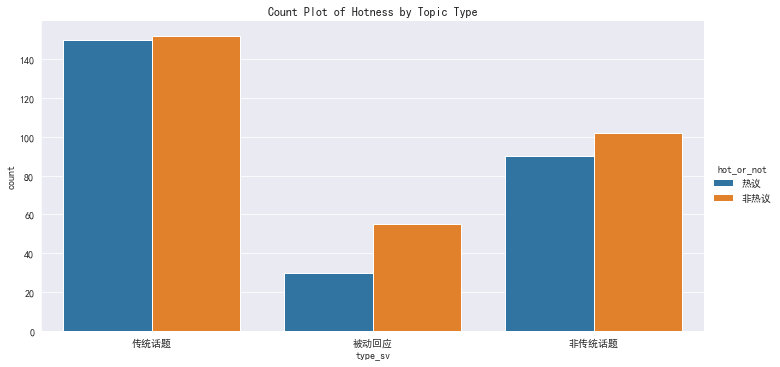

In [14]:
# 话题类型对热议视频的影响
sns.catplot(x='type_sv', hue='hot_or_not', kind='count', data=df, height=5, aspect=2)
plt.title('Count Plot of Hotness by Topic Type')
plt.show()

  对于话题类型与是否热议的关系，其柱状图如上所示。可见：
  1. 话题类型为传统话题的视频，热议和非热议的数目十分接近。并且其总体的数目远超于被动回应和非传统话题。可能的原因是人们大多喜欢传统类型的奥运视频，因此其视频数目也更多。对于传统话题，热议与非热议的数目参半，没有特别大的偏差也是合理的。总之，传统话题的奥运视频观看的人数最多，作品质量好坏参半，因此热议与否也参半。
  2. 被动回应类型的视频数目较少，非热议占多数。可能是这种类型的视频不符合大众喜好，所以比较冷门。
  3. 非传统话题类型的视频的数目少于传统话题，多于被动回应，非热议占多数。可能有一部分年轻人喜欢讨论非传统话题视频，所以其数目要多一些，但总体还是非热议者居多。

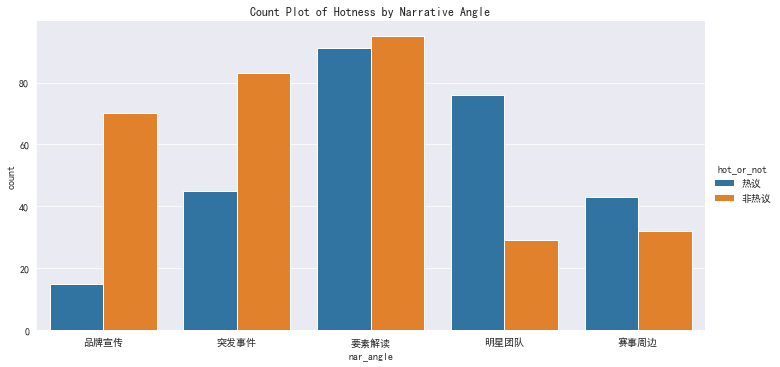

In [11]:
# 叙事角度对热议视频的影响
sns.catplot(x='nar_angle', hue='hot_or_not', kind='count', data=df, height=5, aspect=2)
plt.title('Count Plot of Hotness by Narrative Angle')
plt.show()

  叙事角度对热议与否的柱状图如上图所示。可见：
  1. 品牌宣传角度的视频大多数为非热议，观众可能对奥运品牌并不感兴趣。
  2. 突发事件角度的视频的数目要多于品牌宣传，大多数也为非热议。可能有一部分观众关注奥运赛场上的突发事件，但总体讨论度还是较低。
  3. 要素解读角度的视频的数目最多，热议与非热议基本参半。可见大多数观众主要关注赛事的解读，这方面的视频关注度最高。
  4. 明星团队角度的视频热议的居多，观众对奥运明星的关注热度很高。
  5. 赛事周边角度的视频的数目较少，热议的居多。可能有喜欢运动的人关注赛事周边产品。


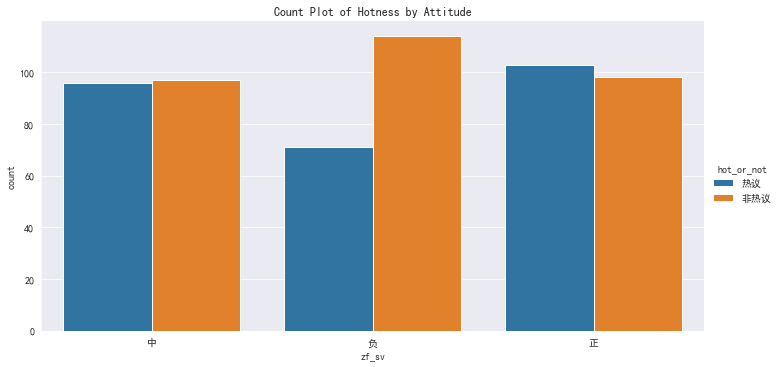

In [12]:
# 态度倾向对热议视频的影响
sns.catplot(x='zf_sv', hue='hot_or_not', kind='count', data=df, height=5, aspect=2)
plt.title('Count Plot of Hotness by Attitude')
plt.show()

  态度倾向和热议与否的柱状图如上所示。态度为中的视频，热议与非热议参半，符合中立原则；态度为负的视频，非热议的居多；态度为正的视频，热议的居多。态度倾向与热议的总体水平相一致。

### 5. 将样本按照 8： 2 比例随机生成训练集和测试集（种子设置为 2023），针对视频是否为热议视频这个分类任务，在训练集上实现决策树、AdaBoost 以及随机森林模型，最后在测试集上测试三种模型的效果并进行对比，需作出 ROC 曲线图并计算 AUC 并写出模型比较的结果

In [12]:
# 数据处理
X = data.drop(['hot_or_not'], axis=1)
y = data['hot_or_not']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)


In [13]:
# 决策树模型
tree_clf = DecisionTreeClassifier(random_state=2023)
tree_params = {'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 7, 10]}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)
tree_grid = GridSearchCV(tree_clf, tree_params, cv=cv, n_jobs=-1, scoring='roc_auc')
tree_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2023, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=2023), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10]},
             scoring='roc_auc')

In [14]:
# AdaBoost模型
ada_clf = AdaBoostClassifier(random_state=2023, base_estimator=DecisionTreeClassifier(max_depth=2))
ada_params = {'n_estimators': [50, 100, 200,250,300], 'learning_rate': [0.1, 0.3, 0.5,0.7,1.0]}
ada_grid = GridSearchCV(ada_clf, ada_params, cv=cv, n_jobs=-1, scoring='roc_auc')
ada_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2023, shuffle=True),
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                                          random_state=2023),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 0.7, 1.0],
                         'n_estimators': [50, 100, 200, 250, 300]},
             scoring='roc_auc')

In [15]:
# 随机森林模型
rf_clf = RandomForestClassifier(random_state=2023)
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7, 10], 'criterion': ['gini', 'entropy']}
rf_grid = GridSearchCV(rf_clf, rf_params, cv=cv, n_jobs=-1, scoring='roc_auc')
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2023, shuffle=True),
             estimator=RandomForestClassifier(random_state=2023), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc')

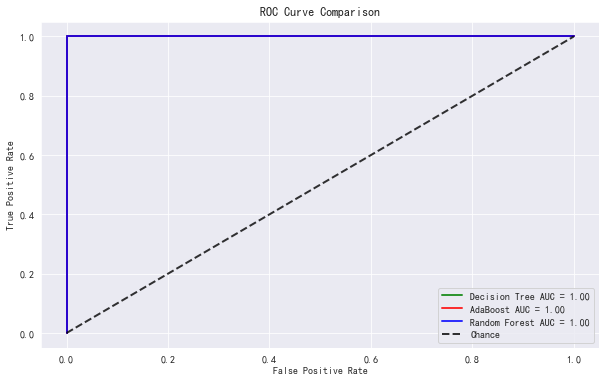

In [16]:
# ROC曲线和AUC值比较
fig, ax = plt.subplots(figsize=(10, 6))

tree_prob = tree_grid.predict_proba(X_test)[:,1]
tree_fpr, tree_tpr, _ = roc_curve(y_test, tree_prob)
tree_roc_auc = auc(tree_fpr, tree_tpr)

ada_prob = ada_grid.predict_proba(X_test)[:,1]
ada_fpr, ada_tpr, _ = roc_curve(y_test, ada_prob)
ada_roc_auc = auc(ada_fpr, ada_tpr)

rf_prob = rf_grid.predict_proba(X_test)[:,1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_prob)
rf_roc_auc = auc(rf_fpr, rf_tpr)

ax.plot(tree_fpr, tree_tpr, lw=2, alpha=0.8, color='g', label='Decision Tree AUC = %0.2f' % (tree_roc_auc))
ax.plot(ada_fpr, ada_tpr, lw=2, alpha=0.8, color='r', label='AdaBoost AUC = %0.2f' % (ada_roc_auc))
ax.plot(rf_fpr, rf_tpr, lw=2, alpha=0.8, color='b', label='Random Forest AUC = %0.2f' % (rf_roc_auc))
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black', label='Chance', alpha=.8)

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05])
ax.set_title('ROC Curve Comparison')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend(loc="lower right")
plt.show()

In [17]:
# 模型比较结果
tree_acc = accuracy_score(y_test, tree_grid.predict(X_test))
ada_acc = accuracy_score(y_test, ada_grid.predict(X_test))
rf_acc = accuracy_score(y_test, rf_grid.predict(X_test))

tree_cm = confusion_matrix(y_test, tree_grid.predict(X_test))
ada_cm = confusion_matrix(y_test, ada_grid.predict(X_test))
rf_cm = confusion_matrix(y_test, rf_grid.predict(X_test))

# 决策树模型结果
print('Decision Tree:')
print('Best Parameters:', tree_grid.best_params_)
print('AUC:', tree_roc_auc)
print('Accuracy:', tree_acc)
print('Confusion Matrix:')
print(tree_cm)

# AdaBoost模型结果
print('AdaBoost:')
print('Best Parameters:', ada_grid.best_params_)
print('AUC:', ada_roc_auc)
print('Accuracy:', ada_acc)
print('Confusion Matrix:')
print(ada_cm)

# 随机森林模型结果
print('Random Forest:')
print('Best Parameters:', rf_grid.best_params_)
print('AUC:', rf_roc_auc)
print('Accuracy:', rf_acc)
print('Confusion Matrix:')
print(rf_cm)

Decision Tree:
Best Parameters: {'criterion': 'gini', 'max_depth': 3}
AUC: 1.0
Accuracy: 1.0
Confusion Matrix:
[[51  0]
 [ 0 65]]
AdaBoost:
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 50}
AUC: 1.0
Accuracy: 1.0
Confusion Matrix:
[[51  0]
 [ 0 65]]
Random Forest:
Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 50}
AUC: 1.0
Accuracy: 1.0
Confusion Matrix:
[[51  0]
 [ 0 65]]


按题目要求，我使用决策树，Adaboost，随机森林三种模型对数据进行建模预测。经多次调试，决策树和Adaboost的准确率为100%，随机森林的准确率略低一些，为99%。可能是样本量比较少或者是其他原因，我得到的ROC曲线如上所示，我觉得存在着问题，等待改正。